In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('Salary_Data.csv')

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
df = df.rename(columns = {'YearsExperience': 'years', 'Salary': 's'}, inplace = False)
df

,years,s
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [14]:
print(kurtosis(df.years))
print(kurtosis(df.s))

-1.0447521989892943
-1.2829125042427751


In [15]:
print(skew(df.years))
print(skew(df.s))

0.3603123252525561
0.3361618825592921


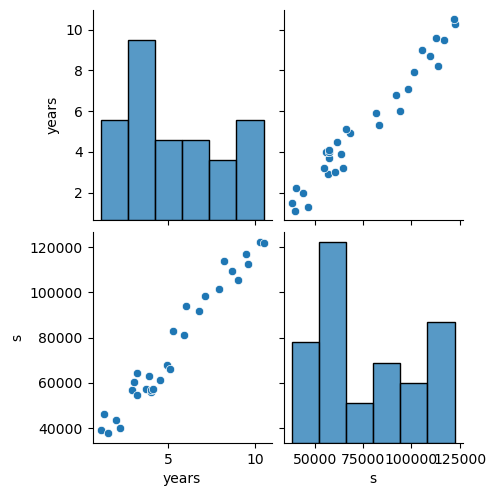

In [16]:
sns.pairplot(df)

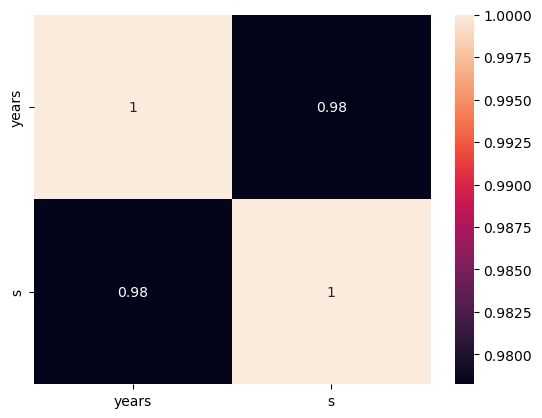

In [17]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Axes: >

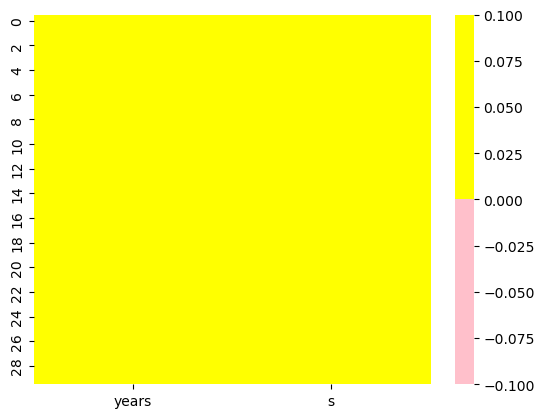

In [19]:
cols = df.columns 
colours = ['#ffc0cb', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

#no null values

<Axes: >

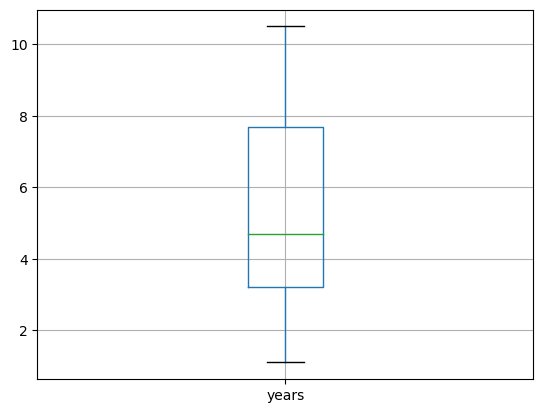

In [20]:
df.boxplot(column=['years'])

<Axes: >

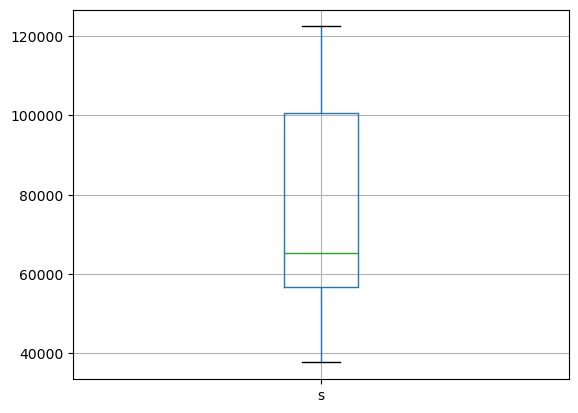

In [21]:
df.boxplot(column=['s'])

In [22]:
df[df.duplicated()].shape

(0, 2)

<Axes: >

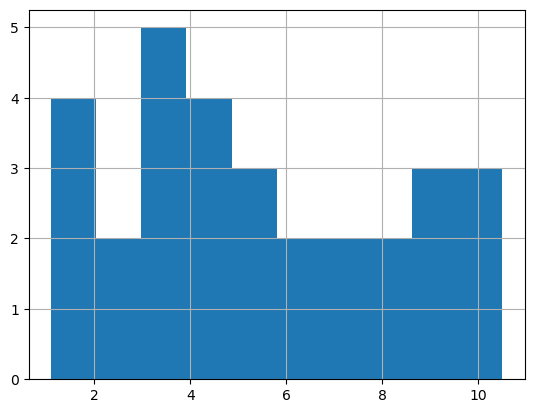

In [24]:
df['years'].hist()

<Axes: >

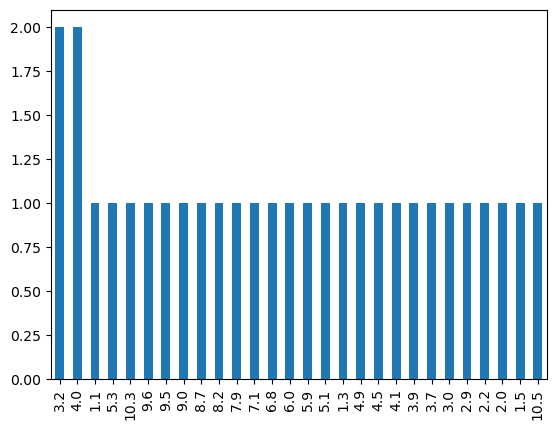

In [26]:
df['years'].value_counts().plot.bar()

In [27]:
#Correlation
df.corr()

,years,s
years,1.000000,0.978242
s,0.978242,1.000000


/var/folders/cm/j358s8y57ddbtd58gtsc0wwr0000gn/T/ipykernel_3415/3777685090.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['years'])


<Axes: xlabel='years', ylabel='Density'>

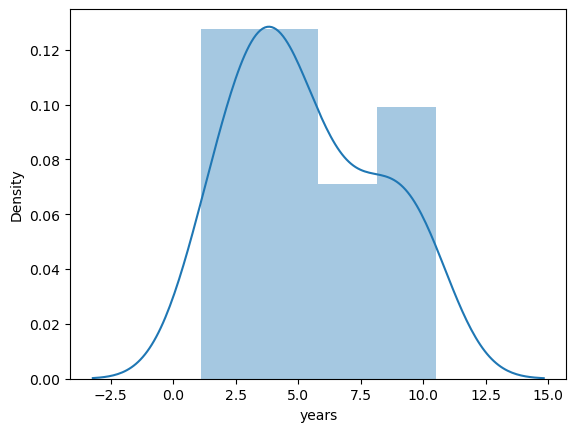

In [28]:
sns.distplot(df['years'])

/var/folders/cm/j358s8y57ddbtd58gtsc0wwr0000gn/T/ipykernel_3415/2280345274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['s'])


<Axes: xlabel='s', ylabel='Density'>

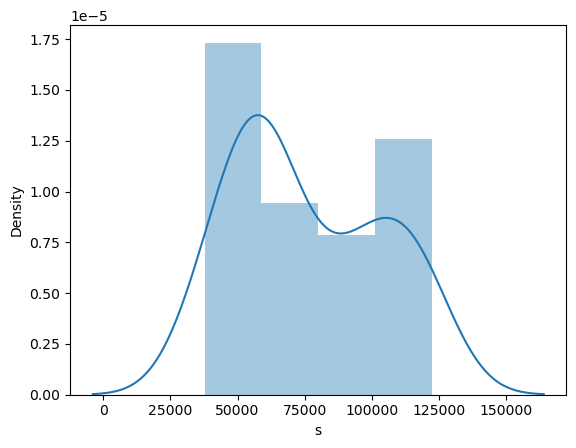

In [29]:
sns.distplot(df['s'])

<Axes: xlabel='years', ylabel='s'>

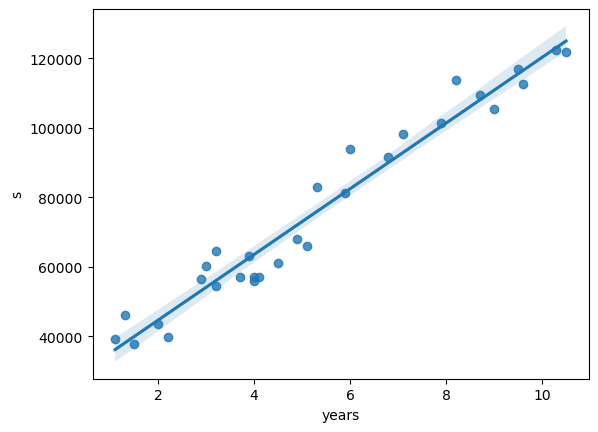

In [31]:
sns.regplot(x="years", y="s", data=df)

# applying transformations

In [33]:
# Features: YearsExperience
X = df[['years']]

# Target variable: Salary
y = df['s']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Apply log transformation to "YearsExperience"
X_train['Log YearsExperience'] = np.log(X_train['years'])
X_test['Log YearsExperience'] = np.log(X_test['years'])

In [38]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [41]:
# Calculate the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 54926065.34346392
R-squared: 0.8924696524444833


# bulding and evaulating the linear regression model

In [42]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [10862.14807326 -6681.17149227]
Intercept: 27618.9287387227


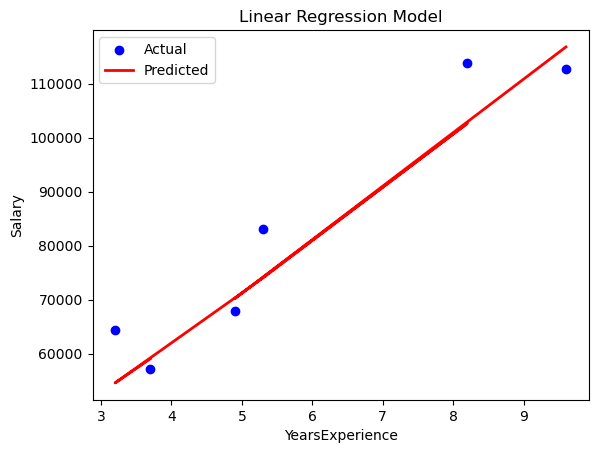

In [45]:
# Plot the linear regression line

plt.scatter(X_test['years'], y_test, color='blue', label='Actual')
plt.plot(X_test['years'], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.legend()
plt.show()